In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from numpy import set_printoptions
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dtale

from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\user\AppData\Local\Temp\ipykernel_3680\697499791.py:19: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [2]:

# read the data 
df = pd.read_excel('House_Rent_Dataset Excel.xlsx')
df.columns = df.columns.str.upper()   #convert the columns to uppercase 
df.head()

,POSTED ON,BHK,RENT,SIZE,FLOOR,AREA TYPE,AREA LOCALITY,CITY,FURNISHING STATUS,TENANT PREFERRED,BATHROOM,POINT OF CONTACT
0,2022-05-16,2,200000,1000,7 out of 8,Carpet Area,Union Park,Mumbai,Furnished,Bachelors/Family,2,Contact Agent
1,2022-05-14,3,200000,1208,5 out of 14,Carpet Area,Khar West,Mumbai,Unfurnished,Bachelors,3,Contact Agent
2,2022-07-09,3,200000,1350,1 out of 5,Carpet Area,anjali,Mumbai,Furnished,Bachelors,3,Contact Agent
3,2022-07-09,3,200000,1350,1 out of 5,Carpet Area,Anand niwas,Mumbai,Furnished,Bachelors,3,Contact Agent
4,2022-06-04,3,200000,1375,15 out of 60,Carpet Area,"Raheja Imperia, Worli",Mumbai,Semi-Furnished,Family,3,Contact Agent


In [3]:
import dtale
dtale.show(df).open_browser()

In [4]:

column_order = [col for col in df.columns if col != 'RENT'] + ['RENT']
df = df[column_order]
# df.head()

In [5]:
df[['FLOOR']] = df['FLOOR'].str.extract(r'(\d+) out of ')
df = df.fillna(value=0)
df['FLOOR'] = df['FLOOR'].astype(int)

In [6]:

# df = df.loc[df['BATHROOM'] != 10]
# df = df.loc[df['POINT OF CONTACT'] != 'Contact Builder']
df = df.drop(['POSTED ON', 'AREA LOCALITY'], axis=1)
df.head(2)
dtale.show(df).open_browser()

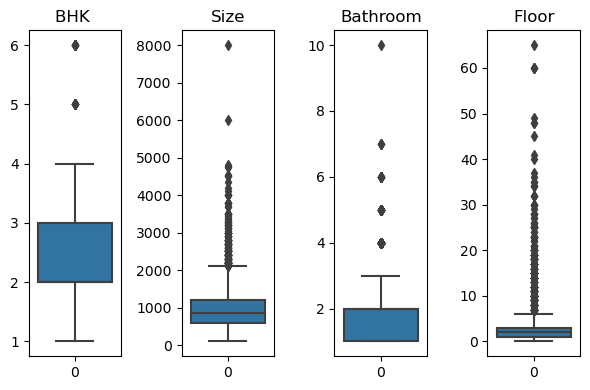

In [7]:
def detectOutliers():
    fig, axs = plt.subplots(1,4, figsize = (6,4))
    plt1 = sns.boxplot(df['BHK'], ax = axs[0])
    plt1.set(title='BHK ')
    plt2 = sns.boxplot(df['SIZE'], ax = axs[1])
    plt2.set(title='Size')
    plt3 = sns.boxplot(df['BATHROOM'], ax = axs[2])
    plt3.set(title='Bathroom')
    plt4 = sns.boxplot(df['FLOOR'], ax = axs[3])
    plt4.set(title='Floor')

    plt.tight_layout()
detectOutliers()

In [8]:
# Outlier reduction for BHK
Q1 = df.BHK.quantile(0.25)
Q3 = df.BHK.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.BHK >= Q1 - 1.5*IQR) & (df.BHK <= Q3 + 1.5*IQR)]

# Outlier reduction for Bathroom
Q1 = df.BATHROOM.quantile(0.25)
Q3 = df.BATHROOM.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.BATHROOM >= Q1 - 1.5*IQR) & (df.BATHROOM <= Q3 + 1.5*IQR)]

# Outlier reduction for Floor
Q1 = df.FLOOR.quantile(0.25)
Q3 = df.FLOOR.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.FLOOR >= Q1 - 1.5*IQR) & (df.FLOOR <= Q3 + 1.5*IQR)]

KeyError: 0

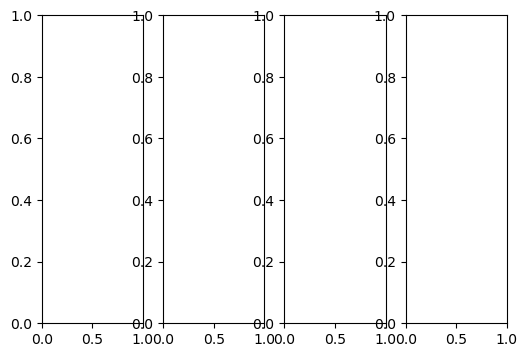

In [9]:
fig, axs = plt.subplots(1,4, figsize = (6,4))
plt1 = sns.boxplot(df['BHK'], ax = axs[0])
plt1.set(title='BHK ')
plt2 = sns.boxplot(df['SIZE'], ax = axs[1])
plt2.set(title='Size')
plt3 = sns.boxplot(df['BATHROOM'], ax = axs[2])
plt3.set(title='Bathroom')
plt4 = sns.boxplot(df['FLOOR'], ax = axs[3])
plt4.set(title='Floor')

Next step visualizing the categorical variables

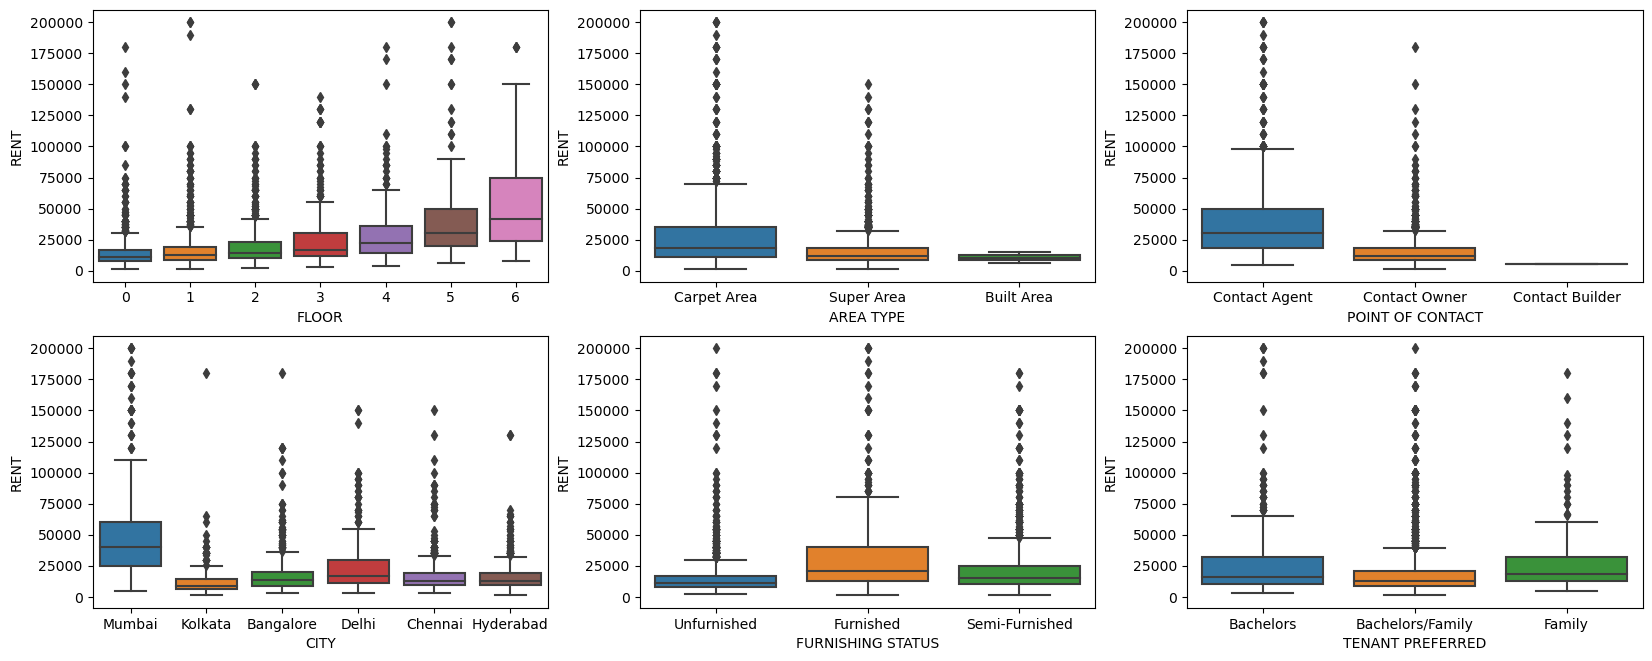

In [10]:

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x='FLOOR', y='RENT', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='AREA TYPE', y='RENT', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='POINT OF CONTACT', y='RENT', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='CITY', y='RENT', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='FURNISHING STATUS', y='RENT', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='TENANT PREFERRED', y='RENT', data=df)
plt.show()

In [12]:
cat_columns = ['AREA TYPE','CITY','FURNISHING STATUS','TENANT PREFERRED', 'POINT OF CONTACT']
df_encoded = pd.get_dummies(df, columns=cat_columns)

In [ ]:
df_encoded.head()

In [ ]:
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = metrics.r2_score(y_test, y_pred)  # R-Squared
print('R-Squared:', r2)

adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)  # Adjusted R-Squared
print('Adjusted R-Squared:', adjusted_r2)

mse = metrics.mean_squared_error(y_test, y_pred)  # Mean Squared Error
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)  # Root Mean Squared Error
print('Root Mean Squared Error:', rmse)

mae = metrics.mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
print('Mean Absolute Error:', mae)

In [ ]:
#Analyze the proportion or percentage of each category in the dataset.
category_proportions = data['BATHROOM'].value_counts(normalize=True)
print(category_proportions*100)

In [ ]:
print(data.groupby("CITY")["RENT"].mean())

In [ ]:
print(data.groupby("BHK")["RENT"].mean())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='FURNISHING STATUS', y='RENT', data=data)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='TENANT PREFERRED', y='RENT', data=data)
plt.show()
sns.boxplot(x='BATHROOM', y='RENT', data=data)
plt.show()

In [ ]:
plt.subplot(3, 5, 3)
data.plot(kind='box', subplots=False, sharex=False, sharey=False)
plt.show()

In [ ]:
df = data.drop(['AREA LOCALITY','FLOOR','POSTED ON'], axis = 1)
df.head()

In [ ]:
le = preprocessing.LabelEncoder()
df['AREA TYPE'] = le.fit_transform(df['AREA TYPE'])
df['CITY'] = le.fit_transform(df['CITY'])
df['FURNISHING STATUS'] = le.fit_transform(df['FURNISHING STATUS'])
df['TENANT PREFERRED'] = le.fit_transform(df['TENANT PREFERRED'])
df['POINT OF CONTACT'] = le.fit_transform(df['POINT OF CONTACT'])

In [ ]:
df.head()

In [ ]:
X = df.iloc[:,[0,2,3,4,5,6,7,8]]
y = df.iloc[:,[1]]
X.head()

In [ ]:
y.head()

In [ ]:
# As all the vlaues ok k gives the same fit score, we can choose k = 8
for i in range(2,9):
    test = SelectKBest(score_func=chi2, k=i) 
    fit = test.fit(X,Y)
    rounded_scores = [round(score, 2) for score in fit.scores_]
    print(rounded_scores, "\n")

In [ ]:
# Here we can see that BHK, Size, Area Type, City, Bathroom and Point of Contact are highly correlated
corr_matrix = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Correlation Ratio (Eta-squared):
# The correlation ratio measures the proportion of the variance in the dependent variable ('Rent') 
# that can be explained by the independent variable (categorical variable).

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

# # Example for Furnishing Status
# eta_squared = pg.eta_squared(df['FURNISHING STATUS'], df['RENT'])
# print(f"Eta-squared for Furnishing Status: {eta_squared['eta_sq']}")

aov = pg.anova(dv='RENT', between='FURNISHING STATUS', data=df, detailed=True)
eta_squared = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(f"Eta-squared for Furnishing Status: {eta_squared}")

In [ ]:
df['BATHROOM'] = np.log(df['BATHROOM'])
df['BATHROOM']

In [ ]:
from scipy import stats
z_scores = stats.zscore(df['BATHROOM'])
outliers = df[(z_scores < -3) | (z_scores > 3)]
outliers